# Trabalho de AM1 - Aprendizado Não Supervisionado

- Unsupervised Learning on Country data ( https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data )

## Dowload de certos componentes

In [ ]:
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

In [ ]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=7a57f247eb098a531f2e985cf8b0b49163c67b232f3463a054d6b3092d95087a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install -U dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=S

In [ ]:
!pip install kneed

In [ ]:
!pip install plotly==5.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Importações de bibliotecas

In [ ]:
import mapclassify

In [ ]:
import plotly.express as px

In [ ]:
import pycountry

In [ ]:
import geopandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly
plotly.__version__

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from sklearn.neighbors import LocalOutlierFactor
from itertools import product
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

import warnings

%matplotlib inline

## Colocando o dataset

Ao fazer uma primeira analise do Dataset foi possível observar certos aspectos. Há dados de 167 países, ou seja, falta alguns para chegar no intervalo de 193-196 ( Não iremos afirmar com toda a certeza quantos tem pois envolve certas questões políticas e religiosas e esse não é nosso objetivo ).

In [ ]:
from google.colab import files
importado = files.upload()

Saving Country-data-final.csv to Country-data-final.csv


In [ ]:
# Carrega o .csv, aqui tem que colocar o nome
arquivo = 'Country-data-final.csv'
data = pd.read_csv(io.BytesIO(importado[arquivo]))
data2 = pd.read_csv(io.BytesIO(importado[arquivo]))
test_data = pd.read_csv(io.BytesIO(importado[arquivo]))



In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,CODE
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,AFG
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,ALB
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,DZA
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,AGO
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,ATG


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  CODE        167 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.5+ KB


In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Removendo a coluna 'CODE' do DataFrame data
data = data.drop(columns=['CODE'])

# Removendo a coluna 'CODE' do DataFrame data2
data2 = data2.drop(columns=['CODE'])

In [ ]:
# Colocar os codigos em outro lugar
code =pd.read_csv('Country-data-final.csv', usecols=['CODE', 'country'])

In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Verificar os dados

In [ ]:
# Informações dos dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Atributos faltantes
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Verificar duplicatas
data.duplicated().sum()

0

In [ ]:
# Informações dos dataset

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Copiar o data

df = pd.DataFrame(data)

## Visualização dos dados

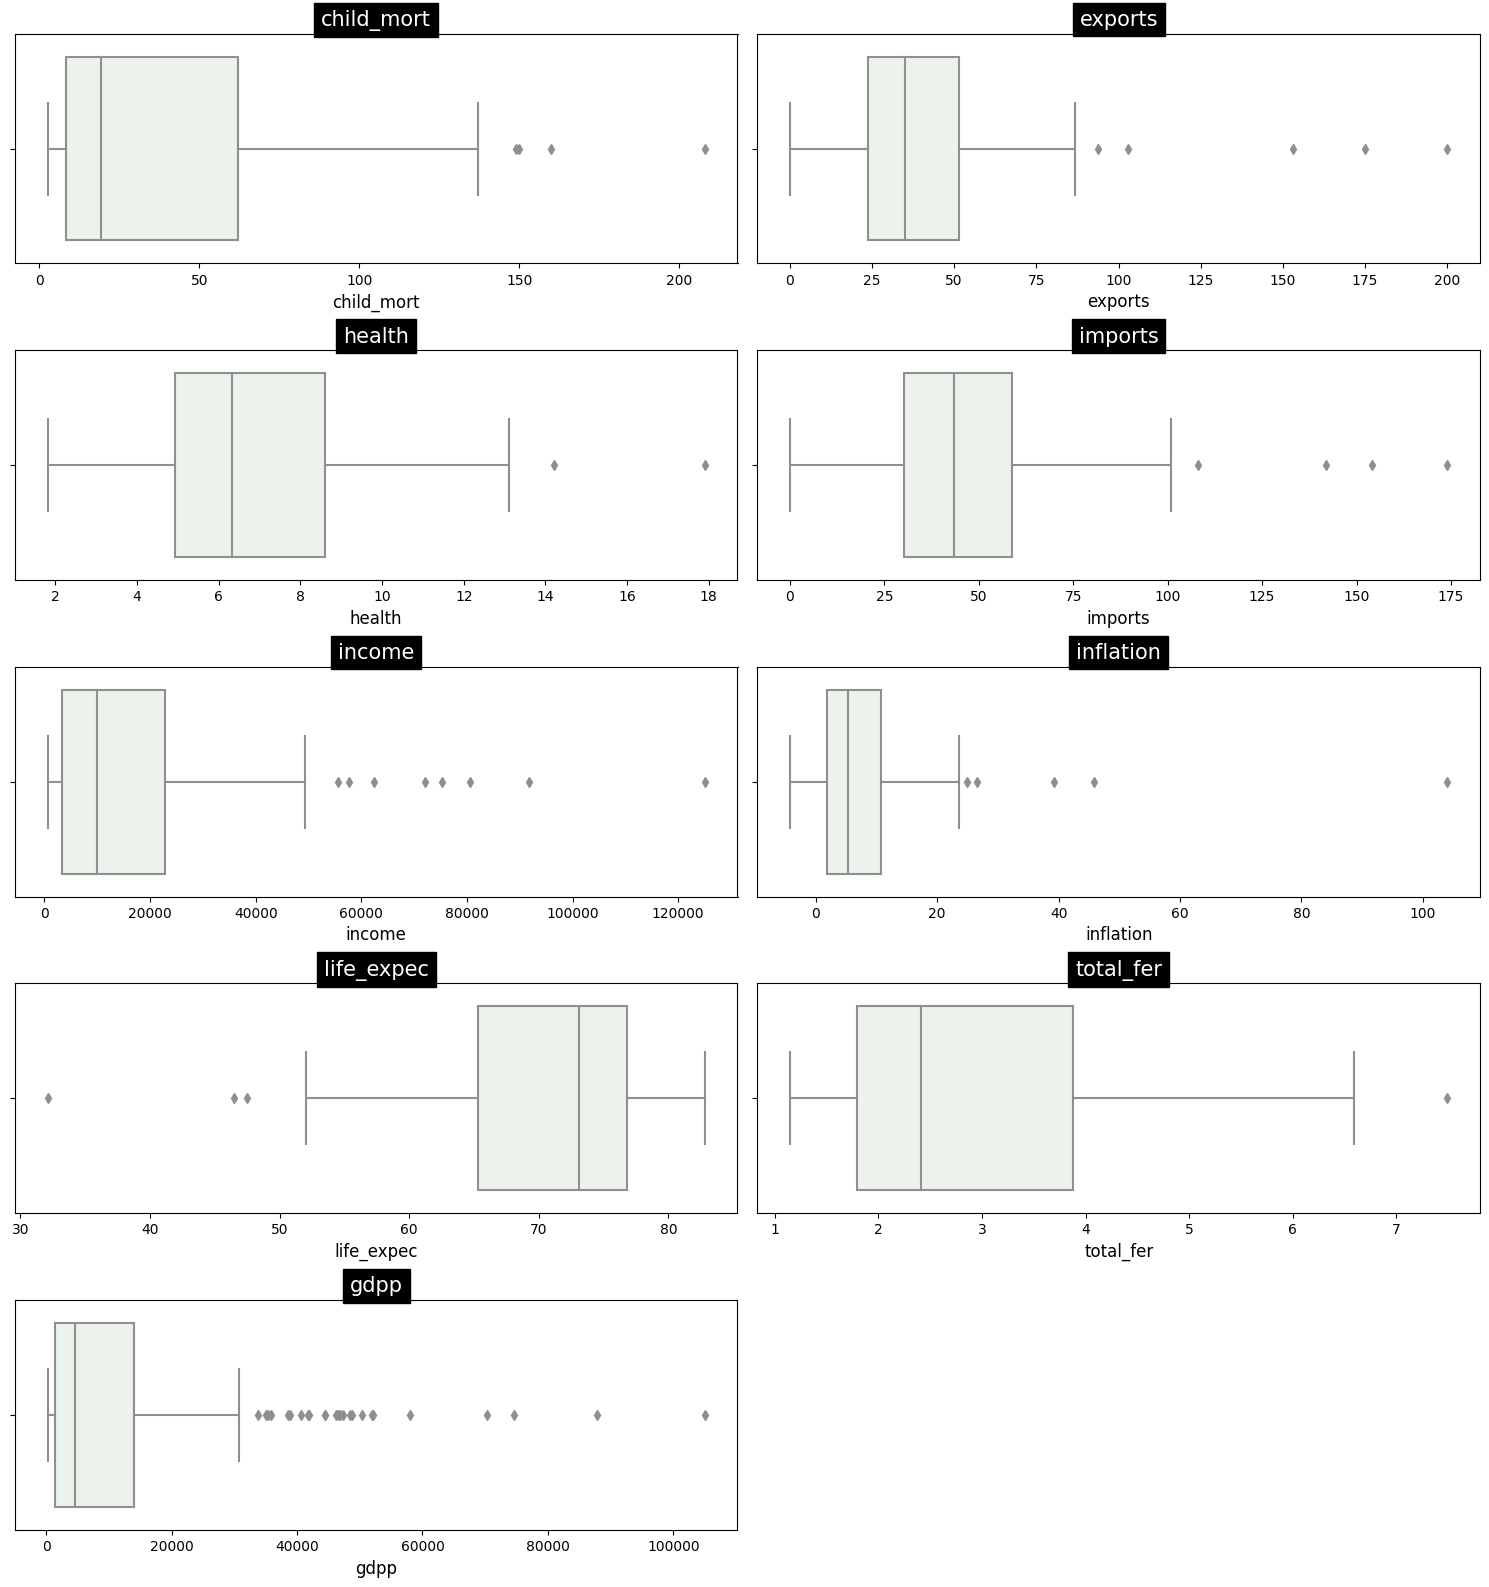

'\nComo Podemos perceber abaixo - Há muitos outliers, porém não tem como remove-los sem perder os poucos dados que temos.\nHá a possibilidade de retirarmos onde estão mais presentes, PIB por capita. Exportações e Renda Líquida\n\n'

In [ ]:
# Visualizar se Há algum Outlier


Numerical = df.drop("country", axis = 1)
sns.set_palette("light:g")
plt.figure(figsize = (15,25))
for idx, i in enumerate(Numerical):
    plt.subplot(8, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

"""
Como Podemos perceber abaixo - Há muitos outliers, porém não tem como remove-los sem perder os poucos dados que temos.
Há a possibilidade de retirarmos onde estão mais presentes, PIB por capita. Exportações e Renda Líquida

"""

In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="child_mort",
                    title="Mortalidade Infantil")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Mortalidade Infantil', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="exports",
                    title="Exportações")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Exportações', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="health",
                    title="Investimento em Saúde")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Investimento em Saúde', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="imports",
                    title="Importações")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Importações', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="income",
                    title="Renda")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Renda', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="inflation",
                    title="Inflação")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Inflação', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="life_expec",
                    title="Expectativa de Vida")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Expectativa de Vida', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="total_fer",
                    title="Taxa de Fertilidade")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'Taxa de Fertilidade', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


In [ ]:
fig = px.choropleth(test_data,
                    locationmode = 'ISO-3',
                    locations='CODE',
                    color="gdpp",
                    title="PIB per Capita")
fig.update_geos(fitbounds="locations", visible = True)
fig.update_layout(legend_title_text = 'PIB per Capita', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)


## Preparação dos Dados

In [ ]:
# Normalização

scaler = MinMaxScaler(feature_range = (0,1))
df1 = df.drop(['country'], axis=1)
norm = scaler.fit_transform(df1)
norm_df = pd.DataFrame(norm,columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer' , 'gdpp'])
norm_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


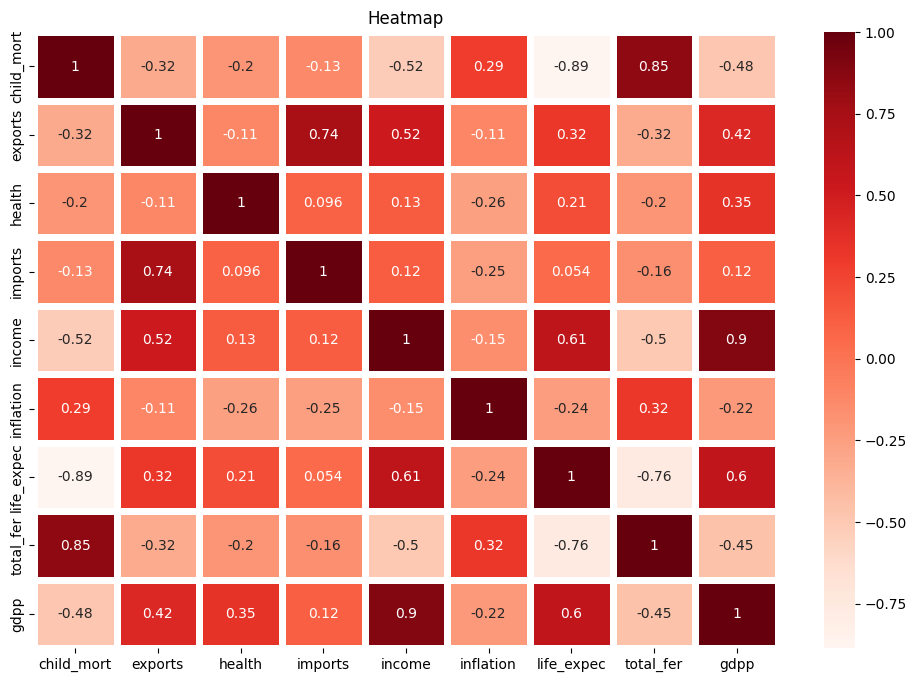

In [ ]:
mask = np.zeros_like(norm_df.corr())
mask[np.triu_indices_from(mask)] = False

plt.figure(figsize=(12,8))
plt.title('Heatmap')
sns.heatmap(norm_df.corr(method="pearson"), cmap='Reds', annot=True, mask=mask, linewidths=5)
plt.show()

In [ ]:
# Para fazer uma divisão, será feito uma cópia

ds = norm_df.copy()

#Scaling
scaler1 = StandardScaler()
scaler1.fit(ds)
scaled_ds = pd.DataFrame(scaler1.transform(ds),columns= ds.columns )

from sklearn.decomposition import PCA
pca_1 = PCA(n_components=None)
pca_1.fit(scaled_ds)

PCA()

Text(0.5, 1.0, 'Cotovelo')

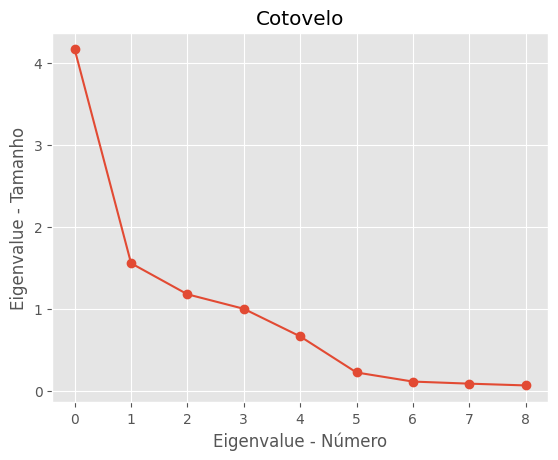

In [ ]:
# Cotovelo

plt.style.use("ggplot")
plt.plot(pca_1.explained_variance_, marker='o')
plt.xlabel("Eigenvalue - Número")
plt.ylabel("Eigenvalue - Tamanho")
plt.title("Cotovelo")

In [ ]:
# Aplicação do PCA - Número de Componentes de acordo com o "Cotovelo"

pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,167.0,6.382120e-17,2.039748,-4.912066,-1.382270,0.022407,1.224328,6.917755
col2,167.0,-2.127373e-17,1.247262,-2.997364,-0.752048,-0.094499,0.553475,6.682090


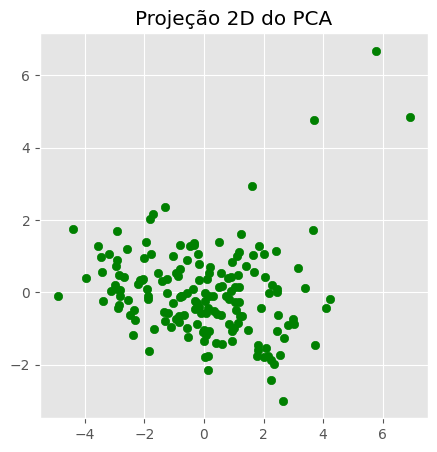

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]

# Verificar como ficou o PCA 2D

plt.figure(figsize = (5,5))
plt.scatter(x,y, c="green", marker="o" )
plt.title("Projeção 2D do PCA")
plt.show()

## Clusters - Kmeans - 3 Clusters


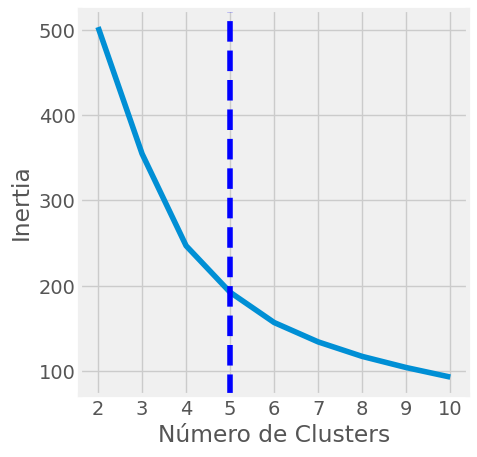

In [ ]:
# Cotovelo

kmeans_set = {'init':'random', 'n_init':10,'max_iter':300, 'random_state':42}

list =[]
for k in range(2,11):
    kmeans =  KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(PCA_ds)
    list.append(kmeans.inertia_)


from kneed import KneeLocator
k1 = KneeLocator(range(2,11),list , curve = 'convex' , direction ='decreasing')
plt.figure(figsize = (5,5))
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),list)
plt.axvline(x=5 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.xticks(range(2,11))
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from kneed import KneeLocator
k1.elbow

5

In [ ]:
# Descobrir qual é o melhor cluster

silhouette_coefficients = []
davies_bouldin = []

for k in range(2,11):
    kmeans = KMeans (n_clusters = k, **kmeans_set)
    kmeans.fit(PCA_ds)
    score1 = silhouette_score(PCA_ds, kmeans.labels_,  metric='euclidean')
    score2 = davies_bouldin_score(PCA_ds, kmeans.labels_)


    silhouette_coefficients.append(score1)
    davies_bouldin.append(score2)

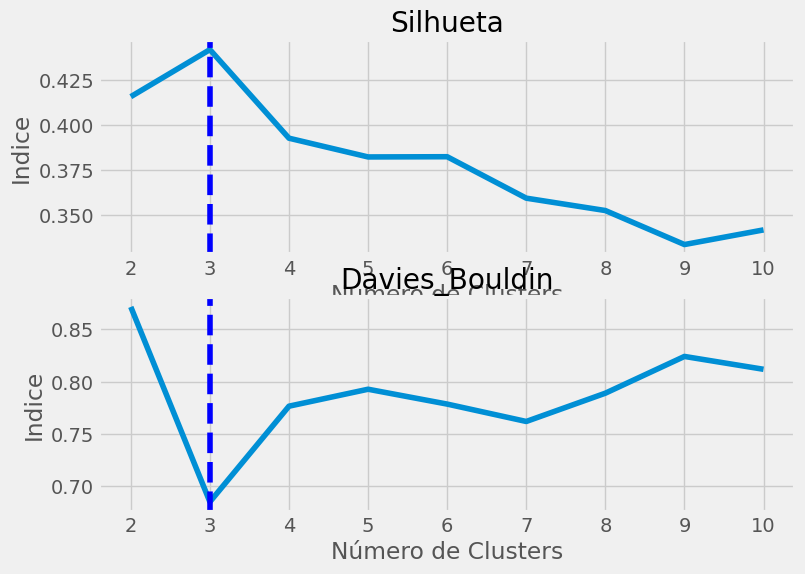

In [ ]:
# Mostrar em gráficos as métricas

plt.figure(figsize = (8, 9))

plt.subplot(311)
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Número de Clusters')
plt.ylabel('Indice')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('Silhueta')

plt.subplot(312)
plt.plot(range(2,11),davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel('Número de Clusters')
plt.ylabel('Indice')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('Davies_Bouldin')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 1.2548299  -0.3959607 ]
 [-1.87436415  0.28911162]
 [ 5.46022462  5.43247334]]


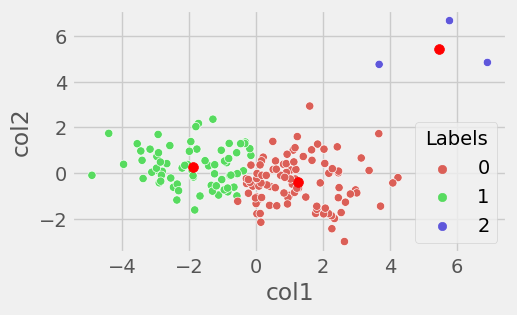

In [ ]:
# Mostrar o diagrama de pontos

kmeans = KMeans(n_clusters = 3,  init='k-means++').fit(PCA_ds)
centroids = kmeans.cluster_centers_
print(centroids)
PCA_ds['Labels'] = kmeans.labels_
plt.figure(figsize = (5,3))
sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=PCA_ds['Labels'],palette=sns.color_palette('hls', 3))

plt.scatter(centroids[:,0], centroids[:,1] , c= 'red', s=50)
plt.show()

In [ ]:
yhat_kmean = kmeans.fit_predict(PCA_ds)
df["KMean_3"]= yhat_kmean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
PCA_ds = PCA_ds.drop(columns=["Labels"])

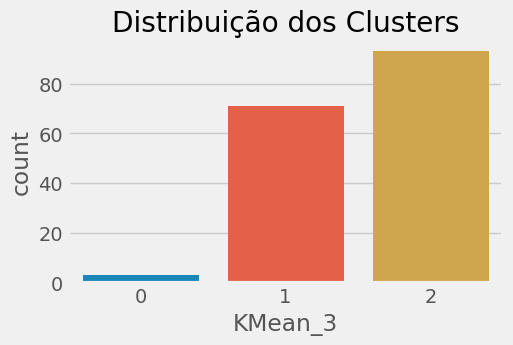

In [ ]:
# Distribuindo dos Clusters
plt.figure(figsize = (5,3))
pl = sns.countplot(x=df["KMean_3"])
pl.set_title("Distribuição dos Clusters")
plt.show()

## Cluster - Kmeans - 5 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[-2.549867    0.48172658]
 [ 2.46204546 -0.91603382]
 [-0.29706419 -0.66604964]
 [ 0.77969542  0.69131449]
 [ 5.46022462  5.43247334]]


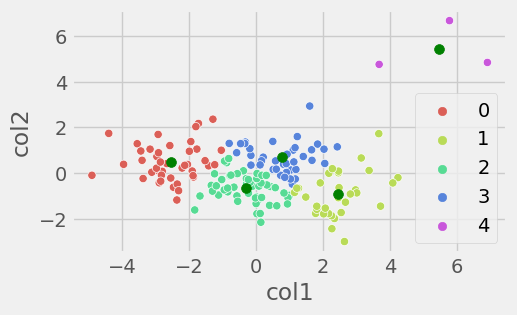

In [ ]:
# Mostrar o diagrama de pontos

kmeansT = KMeans(n_clusters = 5).fit(PCA_ds)
centroids = kmeansT.cluster_centers_
print(centroids)
plt.figure(figsize = (5,3))
sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue = kmeansT.labels_,palette=sns.color_palette('hls', 5))

plt.scatter(centroids[:,0], centroids[:,1] , c= 'green', s=50)
plt.show()

In [ ]:
yhat_kmean4 = kmeansT.fit_predict(PCA_ds)
df["KMean_5"]= yhat_kmean4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



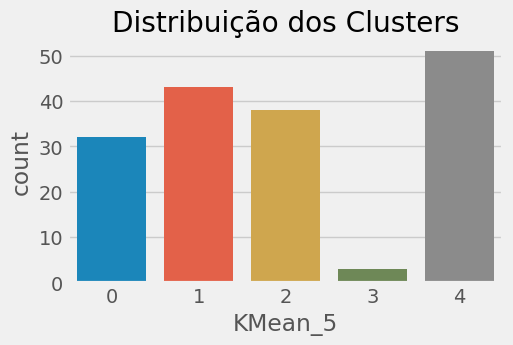

In [ ]:
# Distribuindo dos Clusters
plt.figure(figsize = (5,3))
pl = sns.countplot(x=df["KMean_5"])
pl.set_title("Distribuição dos Clusters")
plt.show()

## Clusters - Aglomerativo ( Hierarquico ) - 3 Clusters


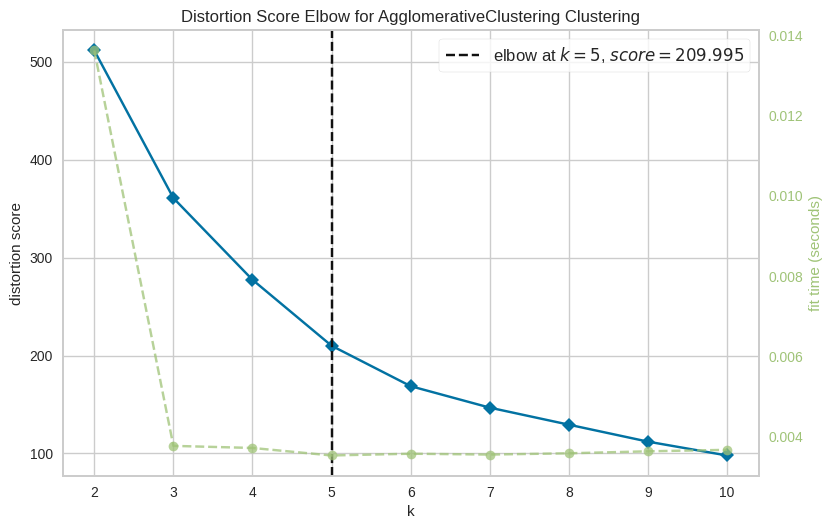

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Método do Cotovelo para analisar o número ideal de grupos
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,11)) # Colocamos a opção de no mínimo 2 e máximo 20 grupos
visualizer.fit(PCA_ds)
visualizer.show()

In [ ]:
# Métricas para escolher os Clusters

silhouette_coefficients = []
davies_bouldin = []

linkage = ['ward', 'complete']

for k in range(2,11):
    agg = AgglomerativeClustering (n_clusters = k, linkage=linkage[0])
    agg.fit(PCA_ds)
    agg1 = AgglomerativeClustering (n_clusters = k, linkage=linkage[1] )
    agg1.fit(PCA_ds)
    score1 = silhouette_score(PCA_ds, agg.labels_,  metric='euclidean')
    score3 = davies_bouldin_score(PCA_ds, agg.labels_)

    silhouette_coefficients.append(score1)
    davies_bouldin.append(score3)

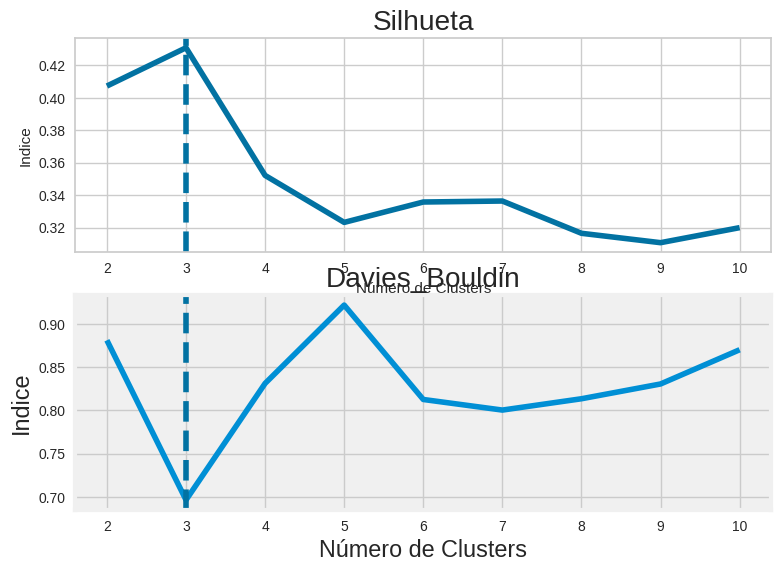

In [ ]:
# Demonstrando as métricas em gráficos - Ward

plt.figure(figsize = (8,9))

plt.subplot(311)
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Número de Clusters')
plt.ylabel('Indice')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('Silhueta')



plt.subplot(312)
plt.plot(range(2,11),davies_bouldin)
plt.xticks(range(2,11))
plt.xlabel('Número de Clusters')
plt.ylabel('Indice')
plt.axvline(x=3 , color ='b' ,label = 'axvline - full height' , ls='--')
plt.title('Davies_Bouldin')

plt.show()

In [ ]:
# Fazer os diversos tipos de aglomeração

linkage = ['ward', 'complete']
AGG1 =[]

agglom_Ward = AgglomerativeClustering(n_clusters=3,linkage=linkage[0]).fit(PCA_ds)
AGG_Ward = agglom_Ward.labels_
AGG1.append(AGG_Ward)

agglom_Complete = AgglomerativeClustering(n_clusters=3,linkage=linkage[1]).fit(PCA_ds)
AGG_Complete = agglom_Complete.labels_
AGG1.append(AGG_Complete)


AGG1 = pd.DataFrame(AGG1)

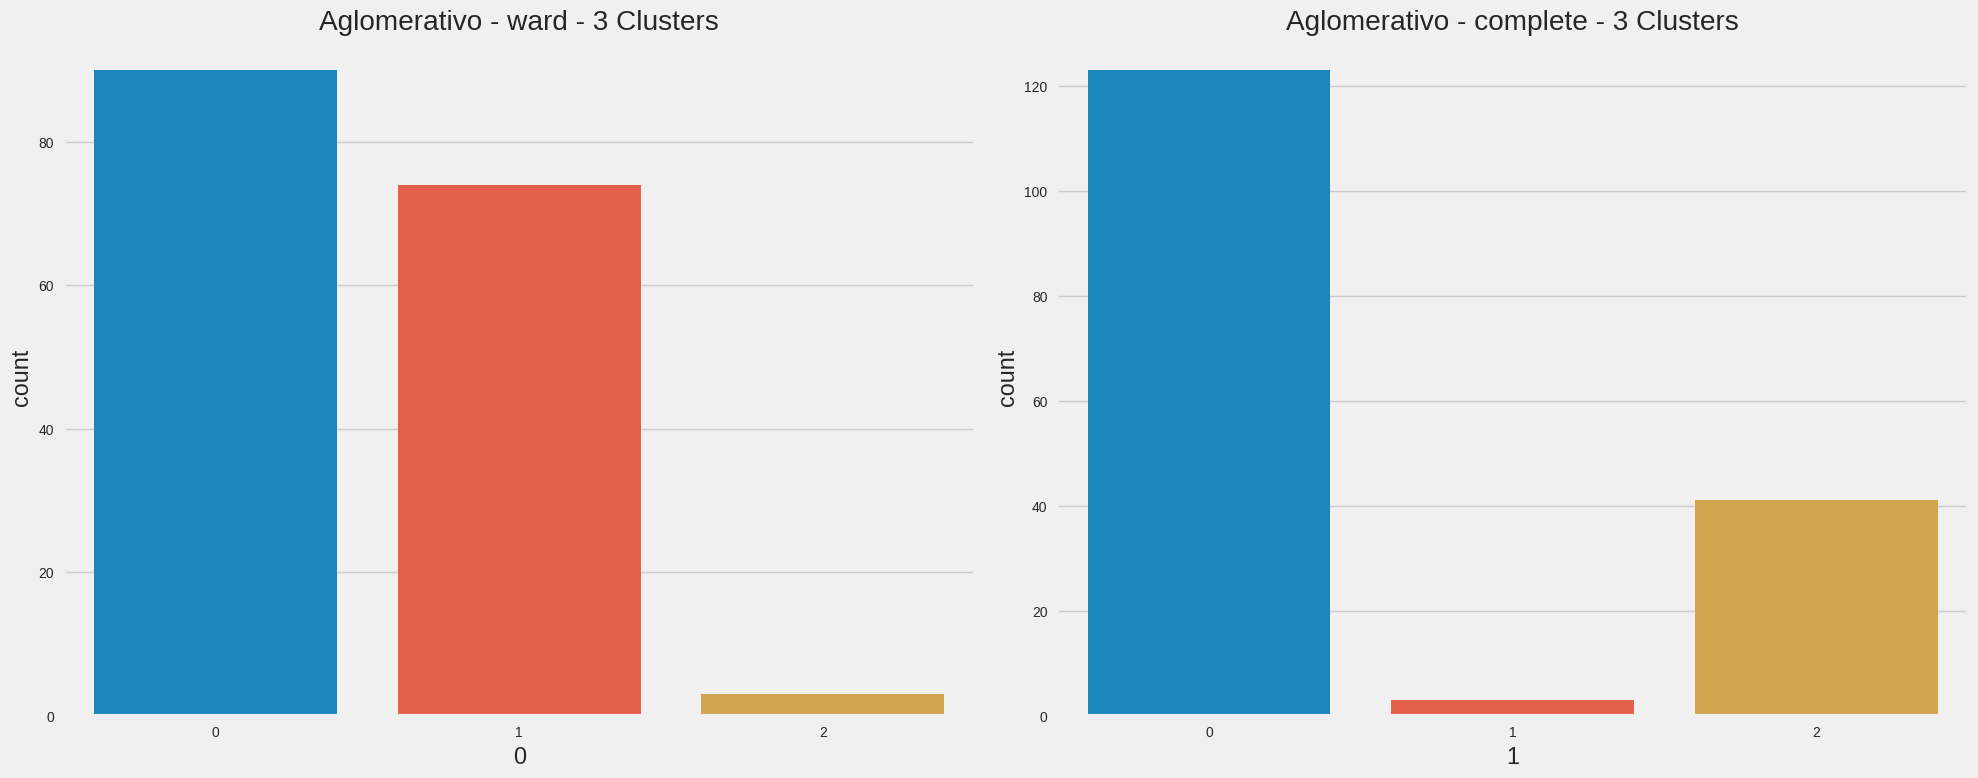

In [ ]:
# PLotando os diversos tipos

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(221)

sns.countplot(x=AGG1.T[0])
ax.set_title('Aglomerativo - ward - 3 Clusters')


ax = fig.add_subplot(222)

sns.countplot(x=AGG1.T[1])
ax.set_title('Aglomerativo - complete - 3 Clusters')

plt.tight_layout()
plt.show()

<ipython-input-70-62ba92e3f4de>:5: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.

<ipython-input-70-62ba92e3f4de>:12: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



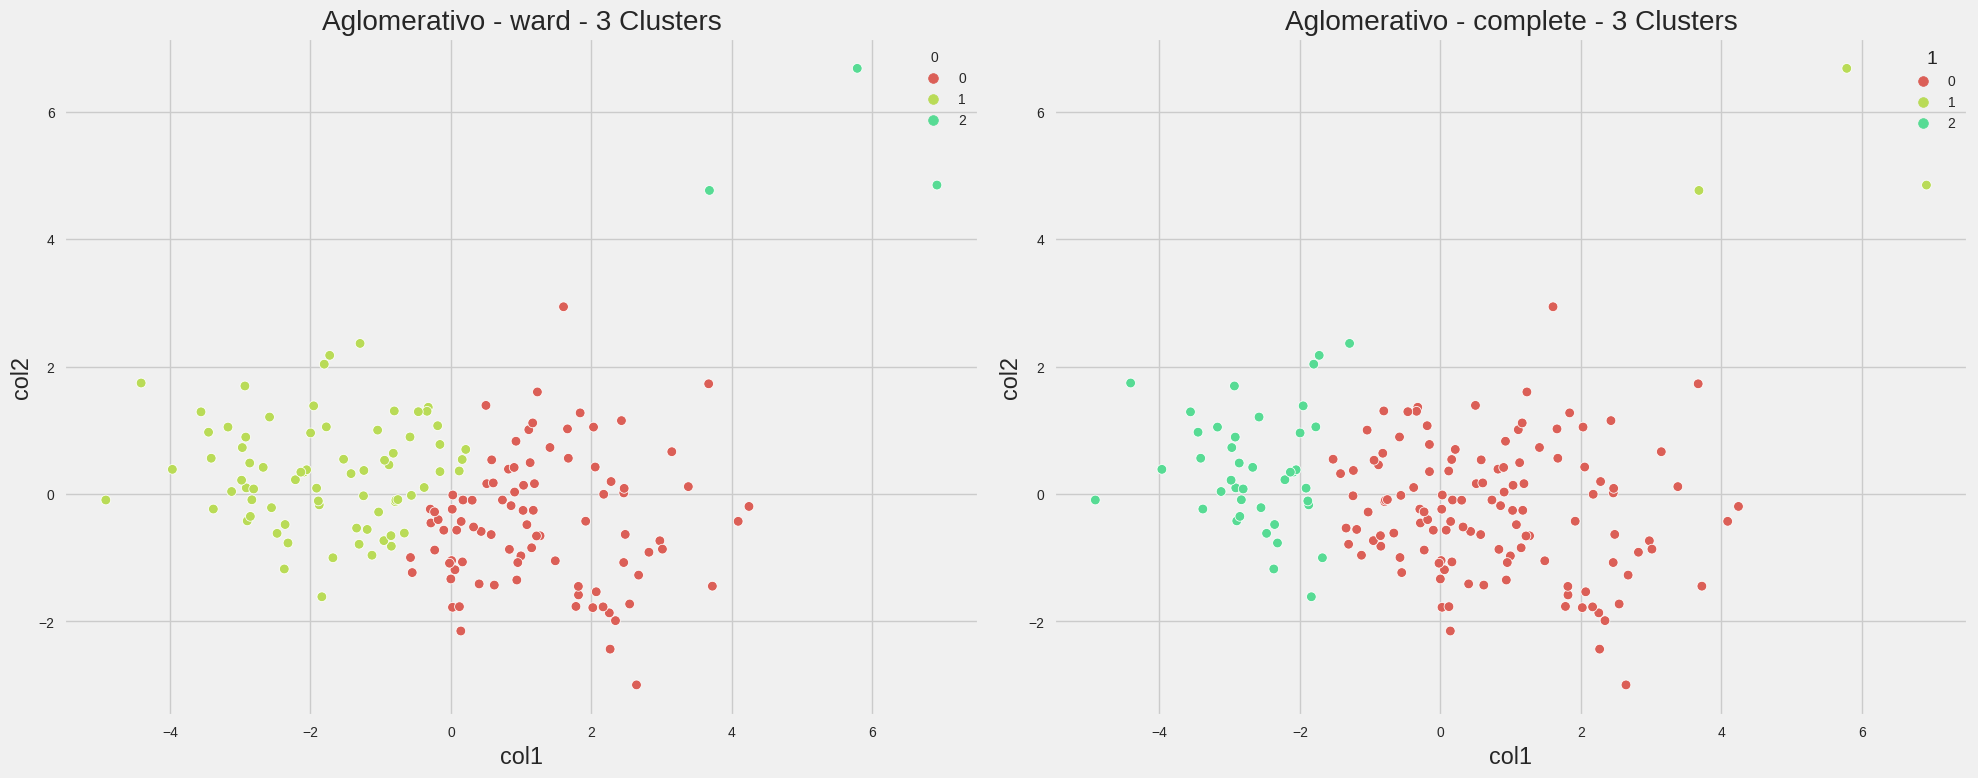

In [ ]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(221)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=AGG1.T[0],
                palette=sns.color_palette('hls', 5))
ax.set_title('Aglomerativo - ward - 3 Clusters')


ax = fig.add_subplot(222)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=AGG1.T[1],
                palette=sns.color_palette('hls', 5))
ax.set_title('Aglomerativo - complete - 3 Clusters')


plt.tight_layout()
plt.show()

In [ ]:
# Para comparar com o kmans, vamos fazer apenas 2 tipos - ward e omplete, respectivamente

yhat_agg1 = agglom_Ward.fit_predict(PCA_ds)
df["Agg_Ward_3"]= yhat_agg1

yhat_agg2 = agglom_Complete.fit_predict(PCA_ds)
df["Agg_Complete_3"]= yhat_agg2

## Clusters - Aglomerativo ( Hierarquico ) - 5 Clusters


In [ ]:
# Fazer os diversos tipos de aglomeração

linkage = ['ward', 'complete']
AGG2 =[]

agglom_Ward_5 = AgglomerativeClustering(n_clusters=5,linkage=linkage[0]).fit(PCA_ds)
AGG_Ward_5 = agglom_Ward_5.labels_
AGG2.append(AGG_Ward_5)

agglom_Complete_5 = AgglomerativeClustering(n_clusters=5,linkage=linkage[1]).fit(PCA_ds)
AGG_Complete_5 = agglom_Complete_5.labels_
AGG2.append(AGG_Complete_5)


AGG2 = pd.DataFrame(AGG2)

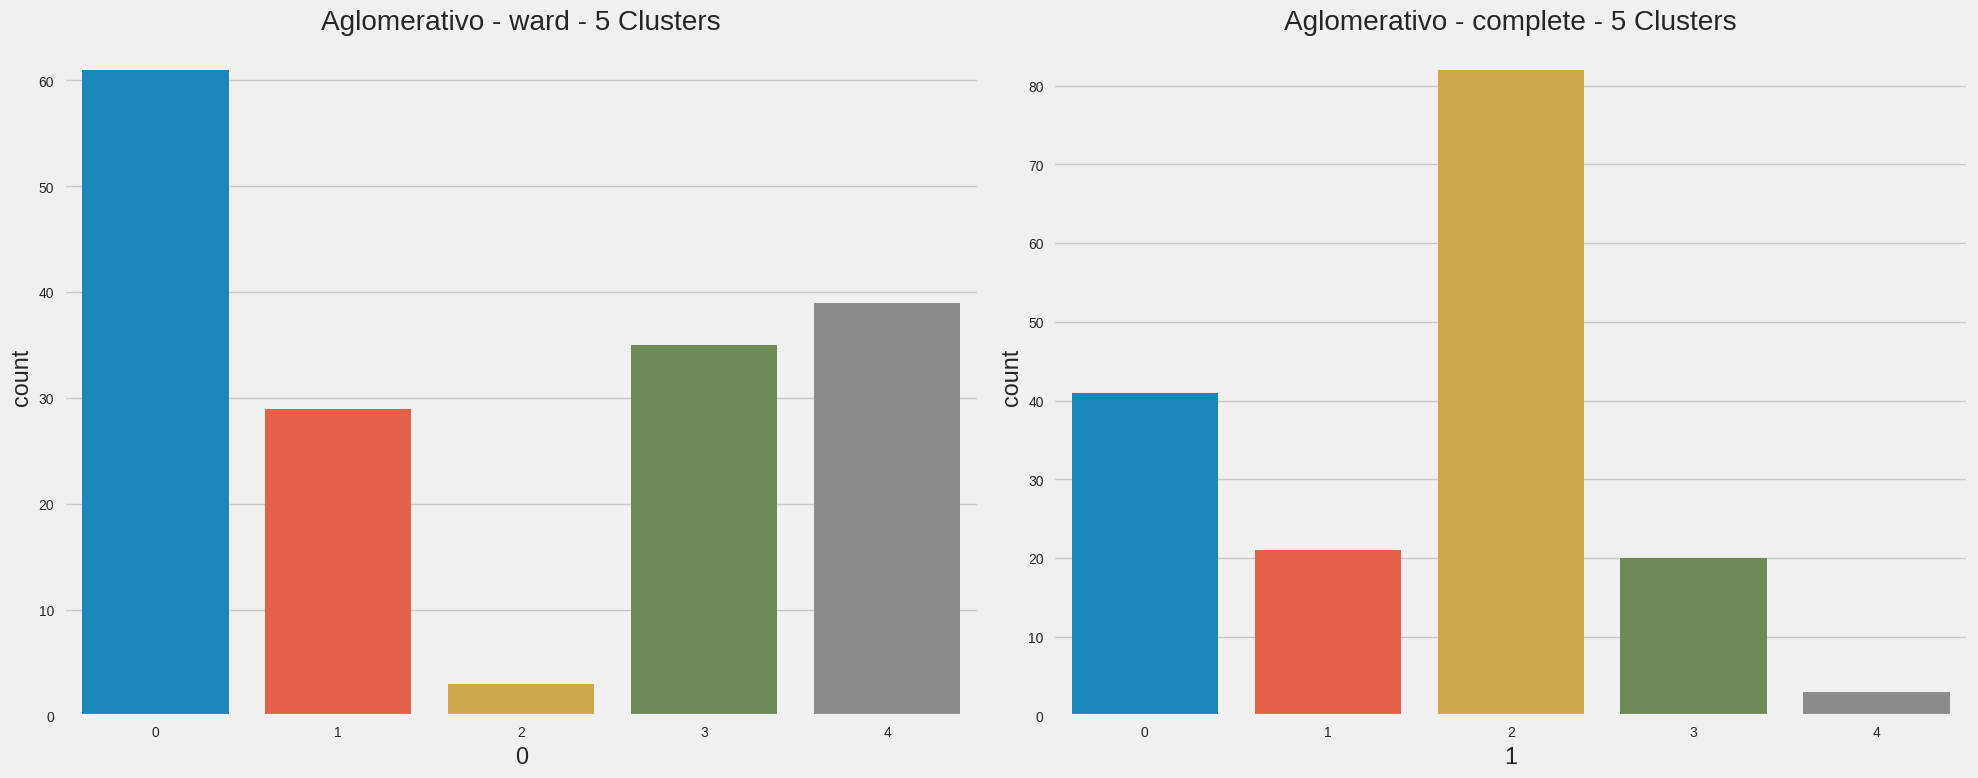

In [ ]:
# PLotando os diversos tipos

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(221)

sns.countplot(x=AGG2.T[0])
ax.set_title('Aglomerativo - ward - 5 Clusters')


ax = fig.add_subplot(222)

sns.countplot(x=AGG2.T[1])
ax.set_title('Aglomerativo - complete - 5 Clusters')


plt.tight_layout()
plt.show()

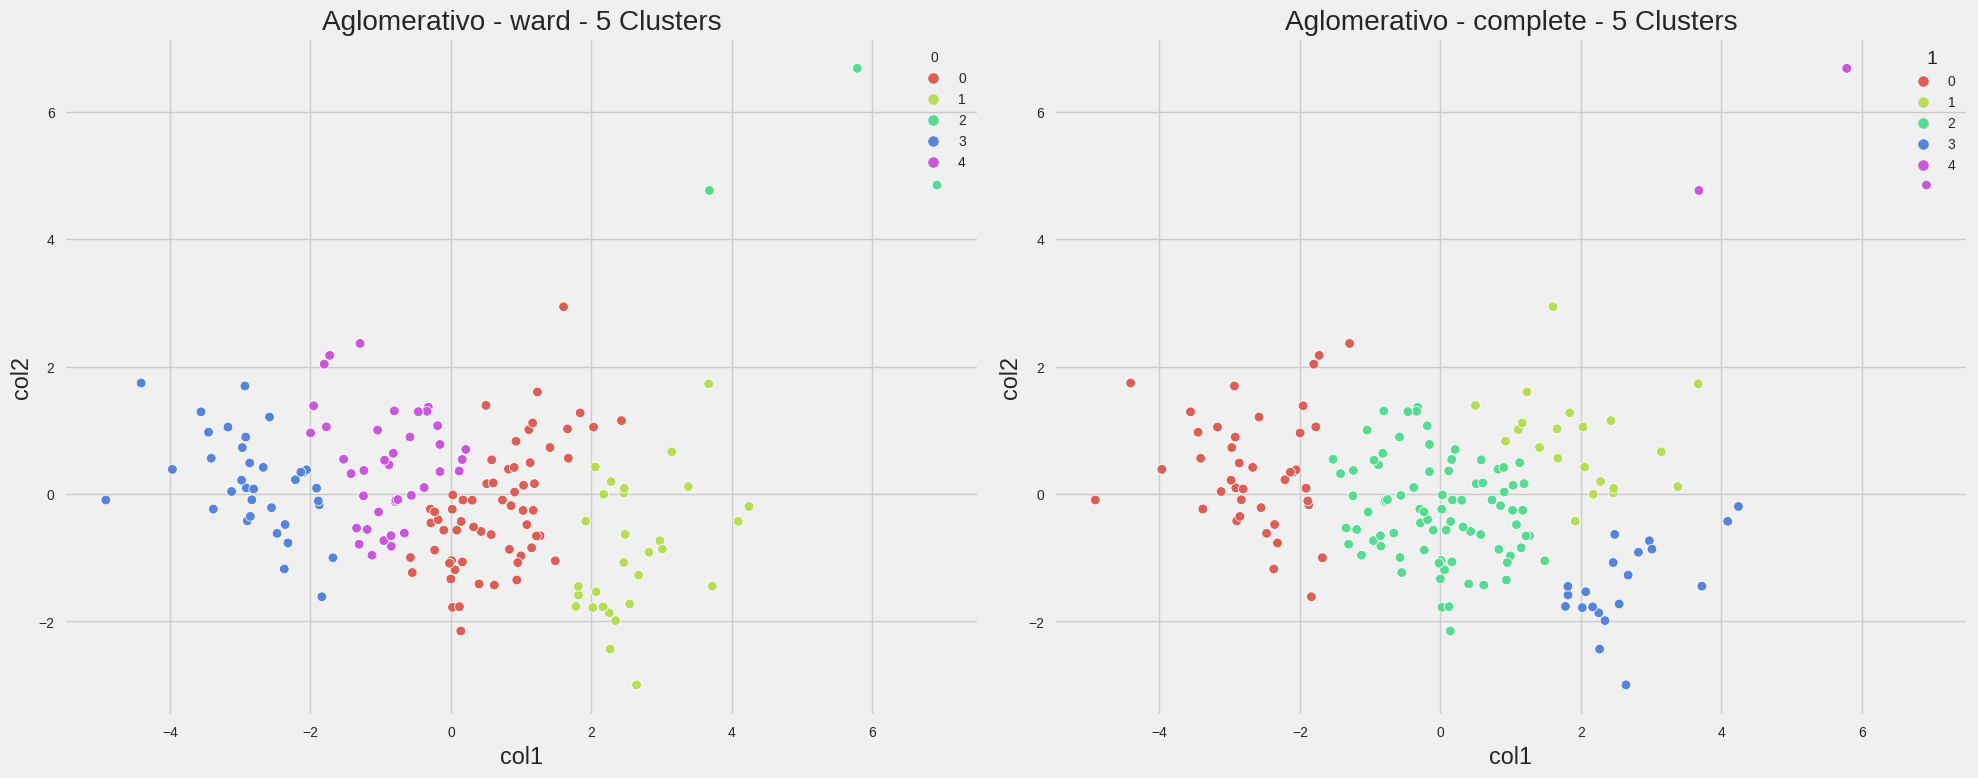

In [ ]:
fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(221)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=AGG2.T[0],
                palette=sns.color_palette('hls', 5))
ax.set_title('Aglomerativo - ward - 5 Clusters')


ax = fig.add_subplot(222)

sns.scatterplot(data =PCA_ds, x='col1',y='col2', hue=AGG2.T[1],
                palette=sns.color_palette('hls', 5))
ax.set_title('Aglomerativo - complete - 5 Clusters')


plt.tight_layout()
plt.show()

In [ ]:
yhat_agg3 = agglom_Ward_5.fit_predict(PCA_ds)
df["Agg_Ward_5"]= yhat_agg3

yhat_agg4 = agglom_Complete_5.fit_predict(PCA_ds)
df["Agg_Complete_5"]= yhat_agg4

## Validação

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

score = silhouette_score(PCA_ds, kmeans.labels_, metric='euclidean')
score2 = davies_bouldin_score(PCA_ds, kmeans.labels_)
print(f'Silhueta para o agrupamento particional usando K-Means para 3 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento particional usando K-Means para 3 Clusters: {score2:.5f}.\n')

score = silhouette_score(PCA_ds, kmeansT.labels_, metric='euclidean')
score2 = davies_bouldin_score(PCA_ds, kmeansT.labels_)
print(f'Silhueta para o agrupamento particional usando K-Means para 5 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento particional usando K-Means para 5 Clusters: {score2:.5f}.\n')


score2 = davies_bouldin_score(PCA_ds,  agglom_Ward.labels_)
score = silhouette_score(PCA_ds, agglom_Ward.labels_, metric='euclidean')
print(f'Silhueta para o agrupamento hierárquico usando Agg Ward para 3 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento hierárquico usando Agg Ward 3 Clusters: {score2:.5f}.\n')

score2 = davies_bouldin_score(PCA_ds,  agglom_Complete.labels_)
score = silhouette_score(PCA_ds, agglom_Complete.labels_, metric='euclidean')
print(f'Silhueta para o agrupamento hierárquico usando Agg Complete para 3 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento hierárquico usando Agg Complete 3 Clusters: {score2:.5f}.\n')

score2 = davies_bouldin_score(PCA_ds,  agglom_Ward_5.labels_)
score = silhouette_score(PCA_ds, agglom_Ward_5.labels_, metric='euclidean')
print(f'Silhueta para o agrupamento hierárquico usando Agg Ward para 5 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento hierárquico usando Agg Ward 5 Clusters: {score2:.5f}.\n')

score2 = davies_bouldin_score(PCA_ds,  agglom_Complete_5.labels_)
score = silhouette_score(PCA_ds, agglom_Complete_5.labels_, metric='euclidean')
print(f'Silhueta para o agrupamento hierárquico usando Agg Complete para 5 Clusters: {score:.5f}.')
print(f'Davies para o agrupamento hierárquico usando Agg Complete para 5 Clusters: {score2:.5f}.\n')


Silhueta para o agrupamento particional usando K-Means para 3 Clusters: 0.44250.
Davies para o agrupamento particional usando K-Means para 3 Clusters: 0.68242.

Silhueta para o agrupamento particional usando K-Means para 5 Clusters: 0.38206.
Davies para o agrupamento particional usando K-Means para 5 Clusters: 0.79265.

Silhueta para o agrupamento hierárquico usando Agg Ward para 3 Clusters: 0.43084.
Davies para o agrupamento hierárquico usando Agg Ward 3 Clusters: 0.69631.

Silhueta para o agrupamento hierárquico usando Agg Complete para 3 Clusters: 0.43387.
Davies para o agrupamento hierárquico usando Agg Complete 3 Clusters: 0.62331.

Silhueta para o agrupamento hierárquico usando Agg Ward para 5 Clusters: 0.32315.
Davies para o agrupamento hierárquico usando Agg Ward 5 Clusters: 0.92161.

Silhueta para o agrupamento hierárquico usando Agg Complete para 5 Clusters: 0.38639.
Davies para o agrupamento hierárquico usando Agg Complete para 5 Clusters: 0.73399.



In [ ]:
mso

## Mapas - Comp

In [ ]:
# Gerar um mapa com base em nomes de países

auxi =pd.merge(code,df,on='country')
auxi

,country,CODE,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_3,Agg_Ward_5,Agg_Complete_5
0,Afghanistan,AFG,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,3,0
1,Albania,ALB,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,2
2,Algeria,DZA,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,2
3,Angola,AGO,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,3,0
4,Antigua and Barbuda,ATG,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,VUT,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,4,2
163,Venezuela,VEN,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,0,2
164,Vietnam,VNM,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,1
165,Yemen,YEM,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,3,0


In [ ]:
auxi['KMean_3'] = auxi['KMean_3'].map({0:'Situação Boa', 1:'Situação Ruim', 2:'Situação Razoavel'})

In [ ]:
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='KMean_3',
                    title='Agrupamento de regiões - KMeans com 3 Clusters'
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)
fig.show()


In [ ]:
auxi['KMean_5'] = auxi['KMean_5'].map({4:'Situação Razoável', 1:'Situação Crítica', 2:'Situação Ruim', 3:'Situação Excelente', 0:'Situação Boa', })

In [ ]:
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='KMean_5',
                    title='Agrupamento de regiões com Kmeans - 5 Clusters'
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 200, title_y = 0.86)
fig.show()

In [ ]:
auxi['Agg_Ward_3'] = auxi['Agg_Ward_3'].map({0:'Situação Razoavel', 1:'Situação Ruim', 2:'Situação Boa'})

In [ ]:
#Cluster Aglomerativo 3 Clusters - Ward
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='Agg_Ward_3',
                    title='Agrupamento Aglomerativo de regiões com 3 Clusters - Ward '
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)
fig.show()

In [ ]:
auxi['Agg_Complete_3'] = auxi['Agg_Complete_3'].map({0:'Situação Razoável', 1:'Situação Boa', 2:'Situação Ruim'})

In [ ]:
#Cluster aglomerativo 3 clusters - Complete
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='Agg_Complete_3',
                    title='Agrupamento Aglomerativo de regiões com 3 Clusters - Complete'
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)
fig.show()

In [ ]:
auxi['Agg_Ward_5'] = auxi['Agg_Ward_5'].map({0:'Situação Razoavel', 4:'Situação Ruim', 3:'Situação Crítica', 2:'Situação Excelente', 1:'Situação Boa', })




In [ ]:
##Cluster aglomerativo 6 clusters - Ward
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='Agg_Ward_5',
                    title='Agrupamento Aglomerativo de regiões com 5 clusters - Ward'
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)
fig.show()

In [ ]:
auxi['Agg_Complete_5'] = auxi['Agg_Complete_5'].map({1:'Situação Ruim', 2:'Situação Razoavel', 0:'Situação Crítica', 4:'Situação Excelente', 3:'Situação Boa', })


In [ ]:
##Cluster aglomerativo 6 clusters - Complete
fig = px.choropleth(auxi,
                    locationmode='ISO-3',
                    locations='CODE',
                    color='Agg_Complete_5',
                    title='Agrupamento Aglomerativo de regiões com 5 clusters - Complete'
                   )
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text = 'Separação dos Clusters', legend_title_side = 'top', title_pad_l = 260, title_y = 0.86)
fig.show()